# 1. 필요한 패키지 import 하기

In [1]:
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import dlib 
print("🌫🛸")

🌫🛸


# 2. 내 이미지 불러오기

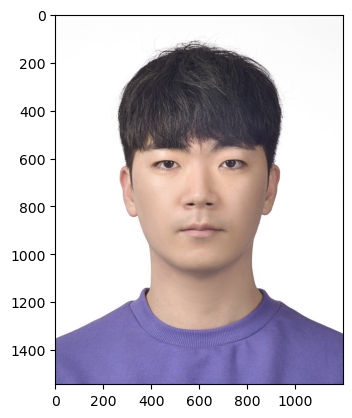

In [2]:
my_image_path = 'images/my_image.png'
img_bgr = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 3. detector 선언 & bounding box 추출 & 찾은 얼굴을 출력

- **dlib의 face detector**: HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾습니다.
- **HOG(Histogram of Oriented Gradients)**: 이미지 내 픽셀의 밝기 변화 방향을 계산하여 객체의 형태를 포착하고, 이걸 최종 특징벡터로 산출하는 알고리즘이다. 산출된 특징벡터는 SVM과 같은 머신러닝 모델에 입력되어, 객체 분류에 활용된다. 

rectangles[[(280, 428) (946, 1094)]]


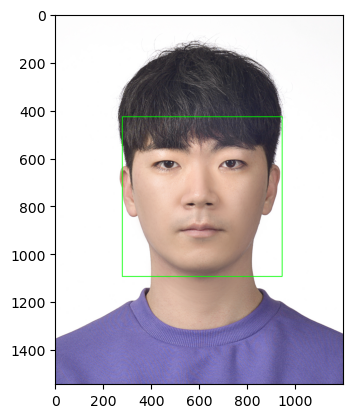

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # left
    t = dlib_rect.top()    # top
    r = dlib_rect.right()  # right
    b = dlib_rect.bottom() # bottom

    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_rgb)
plt.show()

# 4. Dlib Face Landmark Localization & 찾은 Landmark 출력

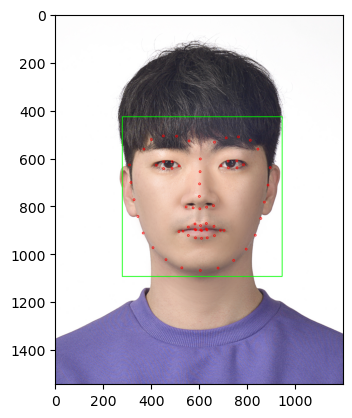

In [4]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb, point, 4, (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.show()

# 5. 스티커 적용하기

(603, 812)
(x,y) : (603,812)
(w,h) : (667,667)
(667, 667, 3)
(x,y) : (270,459)


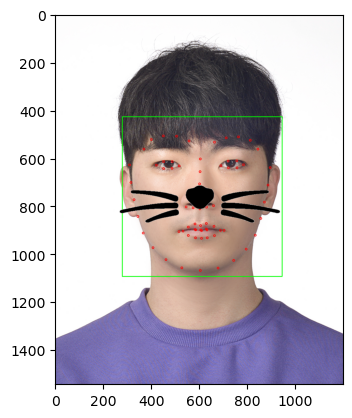

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

sticker_path = 'images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

refined_x = x - w // 2 
refined_y = y - h // 2 - 20

print (f'(x,y) : ({refined_x},{refined_y})')

sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_rgb)
plt.show()

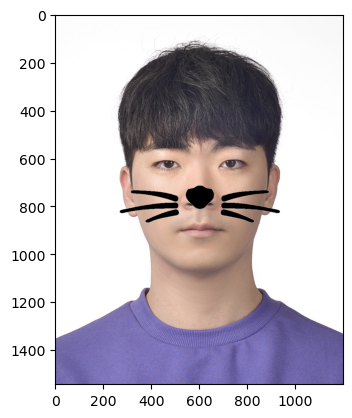

In [6]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()